## Preparing Dataset For analysis

In [8]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [9]:
#Importing Dataset
df = pd.read_excel("data2024.xlsx", sheet_name="All May 2024 data")

In [12]:
#Printing head for the dataset
df.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,23.8,37.89,60.44,29990,36730,49500,78810,125720,NaN,NaN
1,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,58.7,82.5,#,57010,79900,122090,171610,#,NaN,NaN
2,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,50.48,81.01,#,47510,68800,104990,168490,#,NaN,NaN
3,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,99.24,#,#,73710,126080,206420,#,#,NaN,NaN
4,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,99.24,#,#,73710,126080,206420,#,#,NaN,NaN


In [14]:
#checking columns 
df.columns 

Index(['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE',
       'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT',
       'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
       'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75',
       'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')

In [16]:
# Extracting necessary columns for the analysis
necessary_cols = ['OCC_CODE', 'OCC_TITLE', 'TOT_EMP', 'A_MEAN', 'A_MEDIAN', 'H_MEAN', 'H_MEDIAN', 'I_GROUP']
df_clean = df[necessary_cols].copy()

In [18]:
df_clean.head(9)

,OCC_CODE,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,H_MEAN,H_MEDIAN,I_GROUP
0,00-0000,All Occupations,154187380,67920,49500,32.66,23.8,cross-industry
1,11-0000,Management Occupations,10966830,141760,122090,68.15,58.7,cross-industry
2,11-1000,Top Executives,3822780,139860,104990,67.24,50.48,cross-industry
3,11-1010,Chief Executives,211850,262930,206420,126.41,99.24,cross-industry
4,11-1011,Chief Executives,211850,262930,206420,126.41,99.24,cross-industry
5,11-1020,General and Operations Managers,3584420,133120,102950,64,49.5,cross-industry
6,11-1021,General and Operations Managers,3584420,133120,102950,64,49.5,cross-industry
7,11-1030,Legislators,26510,67390,44810,*,*,cross-industry
8,11-1031,Legislators,26510,67390,44810,*,*,cross-industry


In [20]:
#checking for na
df_clean.isna().sum()


OCC_CODE     0
OCC_TITLE    0
TOT_EMP      0
A_MEAN       0
A_MEDIAN     0
H_MEAN       0
H_MEDIAN     0
I_GROUP      0
dtype: int64

In [22]:
# checking for symbols in the dataset
symbols = ['*', '**', '#']

for symbol in symbols:
    print(f"Rows with '{symbol}':")
    print((df_clean == symbol).sum())


Rows with '*':
OCC_CODE         0
OCC_TITLE        0
TOT_EMP          0
A_MEAN        4565
A_MEDIAN      4565
H_MEAN       20074
H_MEDIAN     20074
I_GROUP          0
dtype: int64
Rows with '**':
OCC_CODE         0
OCC_TITLE        0
TOT_EMP      16753
A_MEAN           0
A_MEDIAN         0
H_MEAN           0
H_MEDIAN         0
I_GROUP          0
dtype: int64
Rows with '#':
OCC_CODE        0
OCC_TITLE       0
TOT_EMP         0
A_MEAN        296
A_MEDIAN     2542
H_MEAN        296
H_MEDIAN     2498
I_GROUP         0
dtype: int64


In [24]:
# Replace symbols with NaN
df_clean.replace(['*', '**', '#'], pd.NA, inplace=True)

In [26]:
#checking for na
df_clean.isna().sum()

OCC_CODE         0
OCC_TITLE        0
TOT_EMP      16753
A_MEAN        4861
A_MEDIAN      7107
H_MEAN       20370
H_MEDIAN     22572
I_GROUP          0
dtype: int64

In [28]:
# dropping few rows
df_clean = df_clean.dropna(subset=['A_MEAN', 'TOT_EMP', 'I_GROUP'])

In [30]:
df_clean.head(10)

,OCC_CODE,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,H_MEAN,H_MEDIAN,I_GROUP
0,00-0000,All Occupations,154187380,67920,49500,32.66,23.8,cross-industry
1,11-0000,Management Occupations,10966830,141760,122090,68.15,58.7,cross-industry
2,11-1000,Top Executives,3822780,139860,104990,67.24,50.48,cross-industry
3,11-1010,Chief Executives,211850,262930,206420,126.41,99.24,cross-industry
4,11-1011,Chief Executives,211850,262930,206420,126.41,99.24,cross-industry
5,11-1020,General and Operations Managers,3584420,133120,102950,64,49.5,cross-industry
6,11-1021,General and Operations Managers,3584420,133120,102950,64,49.5,cross-industry
7,11-1030,Legislators,26510,67390,44810,<NA>,<NA>,cross-industry
8,11-1031,Legislators,26510,67390,44810,<NA>,<NA>,cross-industry
9,11-2000,"Advertising, Marketing, Promotions, Public Rel...",1122770,163740,144530,78.72,69.48,cross-industry


In [32]:
# Checking datatype
df_clean.dtypes

OCC_CODE     object
OCC_TITLE    object
TOT_EMP      object
A_MEAN       object
A_MEDIAN     object
H_MEAN       object
H_MEDIAN     object
I_GROUP      object
dtype: object

In [34]:
# converting datatype
cols_to_convert = ['TOT_EMP', 'A_MEAN', 'A_MEDIAN', 'H_MEAN', 'H_MEDIAN']
for col in cols_to_convert:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

In [36]:
# Checking datatype
df_clean.dtypes

OCC_CODE      object
OCC_TITLE     object
TOT_EMP        int64
A_MEAN         int64
A_MEDIAN     float64
H_MEAN       float64
H_MEDIAN     float64
I_GROUP       object
dtype: object

In [38]:
#checking for na
df_clean.isna().sum()

OCC_CODE         0
OCC_TITLE        0
TOT_EMP          0
A_MEAN           0
A_MEDIAN      1989
H_MEAN       15468
H_MEDIAN     17422
I_GROUP          0
dtype: int64

In [40]:
df = df_clean.copy()

## Descriptive stats and EDA (Summary + Plots)

In [43]:
df.head()

,OCC_CODE,OCC_TITLE,TOT_EMP,A_MEAN,A_MEDIAN,H_MEAN,H_MEDIAN,I_GROUP
0,00-0000,All Occupations,154187380,67920,49500.0,32.66,23.80,cross-industry
1,11-0000,Management Occupations,10966830,141760,122090.0,68.15,58.70,cross-industry
2,11-1000,Top Executives,3822780,139860,104990.0,67.24,50.48,cross-industry
3,11-1010,Chief Executives,211850,262930,206420.0,126.41,99.24,cross-industry
4,11-1011,Chief Executives,211850,262930,206420.0,126.41,99.24,cross-industry


In [45]:
#Summary Statistics
df.describe()

,TOT_EMP,A_MEAN,A_MEDIAN,H_MEAN,H_MEDIAN
count,3.880930e+05,388093.00000,386104.000000,372625.000000,370671.000000
mean,1.337889e+04,70560.44662,64925.619134,33.751107,31.058560
std,3.725153e+05,38620.58584,31604.022349,18.659434,15.252267
min,3.000000e+01,17230.00000,15080.000000,8.290000,7.250000
25%,1.000000e+02,45350.00000,43070.000000,21.640000,20.500000
50%,3.400000e+02,59860.00000,56930.000000,28.470000,26.950000
75%,1.630000e+03,84470.00000,78640.000000,40.330000,37.610000
max,1.541874e+08,826360.00000,239130.000000,397.290000,114.970000


In [47]:
# Top 10 Highest Paying Jobs
top10 = df.sort_values(by='A_MEAN', ascending=False).head(10)
top10[['OCC_TITLE', 'A_MEAN']]


,OCC_TITLE,A_MEAN
17873,Chief Executives,826360
17872,Chief Executives,826360
17544,Chief Executives,826360
17545,Chief Executives,826360
145915,Chief Executives,712780
145914,Chief Executives,712780
135043,Chief Executives,621970
135040,Chief Executives,621970
193290,"Surgeons, All Other",556400
193258,"Orthopedic Surgeons, Except Pediatric",546740


In [49]:
df[['OCC_TITLE', 'A_MEAN']].sort_values(by='A_MEAN', ascending=True).head(10)

,OCC_TITLE,A_MEAN
357082,"Bus Drivers, School",17230
407897,"Bus Drivers, School",17460
357209,"Bus Drivers, School",17480
101169,"Healthcare Support Workers, All Other",17700
407899,"Bus Drivers, School",17830
357077,"Bus Drivers, School",18520
154492,Food and Beverage Serving Workers,18610
165405,Waiters and Waitresses,18640
165404,Waiters and Waitresses,18640
357312,"Bus Drivers, School",18700


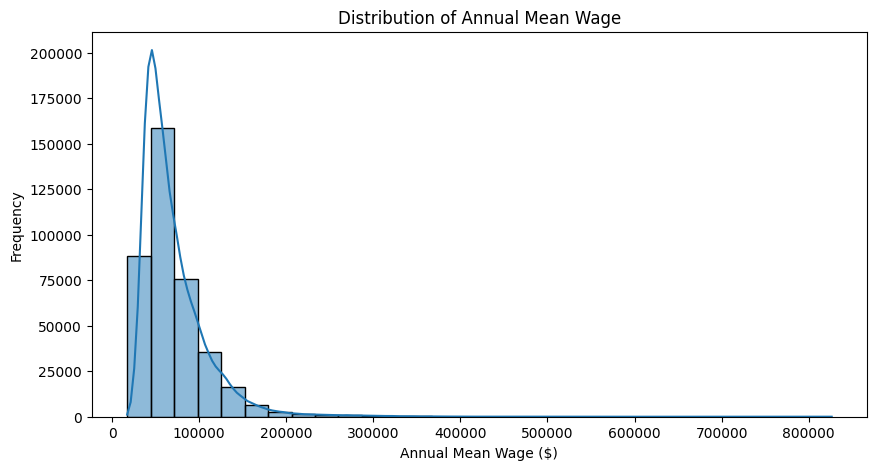

In [51]:
# Distribution Plot of Annual Mean Wage
plt.figure(figsize=(10, 5))
sns.histplot(df['A_MEAN'], bins=30, kde=True)
plt.title('Distribution of Annual Mean Wage')
plt.xlabel('Annual Mean Wage ($)')
plt.ylabel('Frequency')
plt.show()

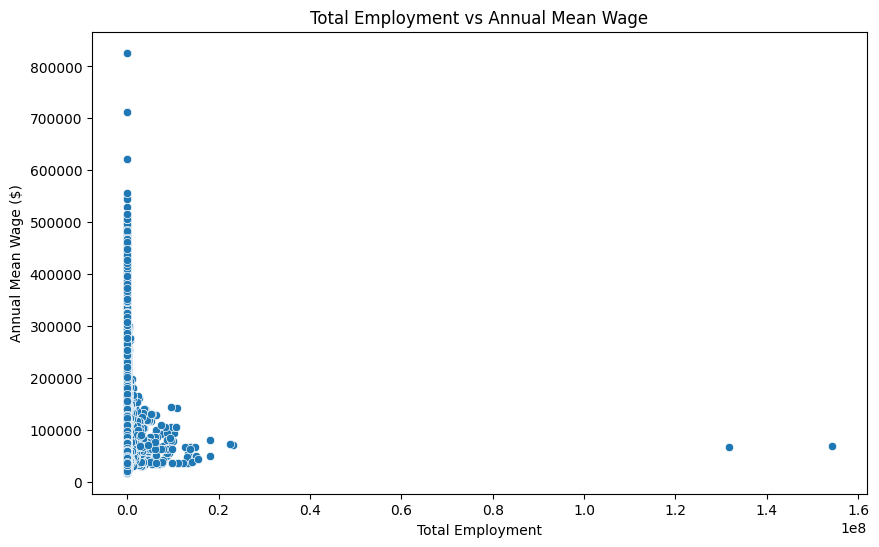

In [52]:
# Employment vs Wage Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TOT_EMP', y='A_MEAN', data=df_clean)
plt.title('Total Employment vs Annual Mean Wage')
plt.xlabel('Total Employment')
plt.ylabel('Annual Mean Wage ($)')
plt.show()


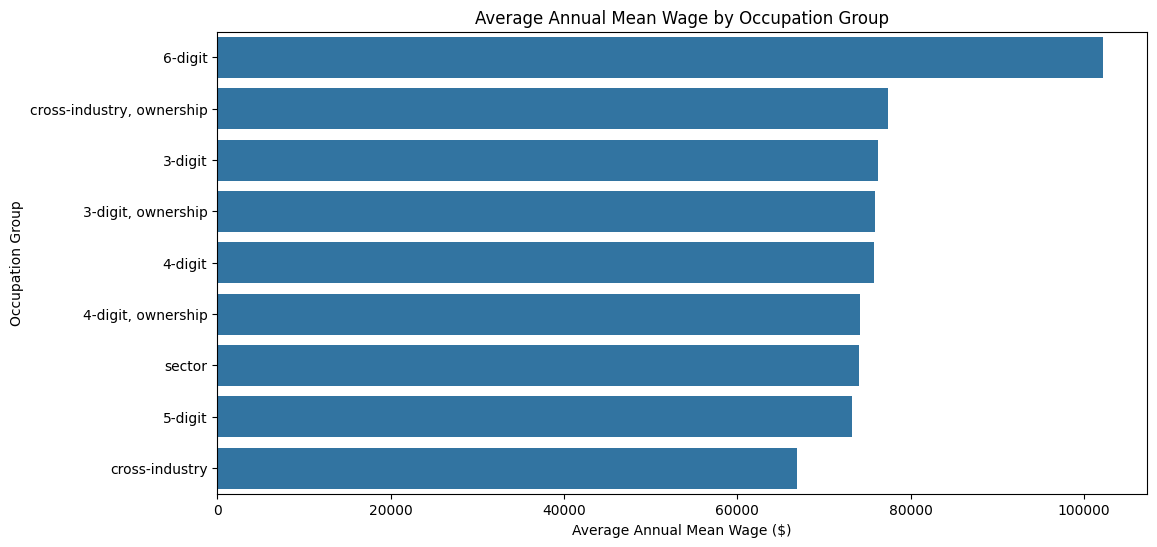

In [54]:
# Mean Wage by Occupation Group (Bar Plot)

group_means = df.groupby('I_GROUP')['A_MEAN'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))

sns.barplot(x=group_means.values, y=group_means.index)
plt.title('Average Annual Mean Wage by Occupation Group')
plt.xlabel('Average Annual Mean Wage ($)')
plt.ylabel('Occupation Group')
plt.show()


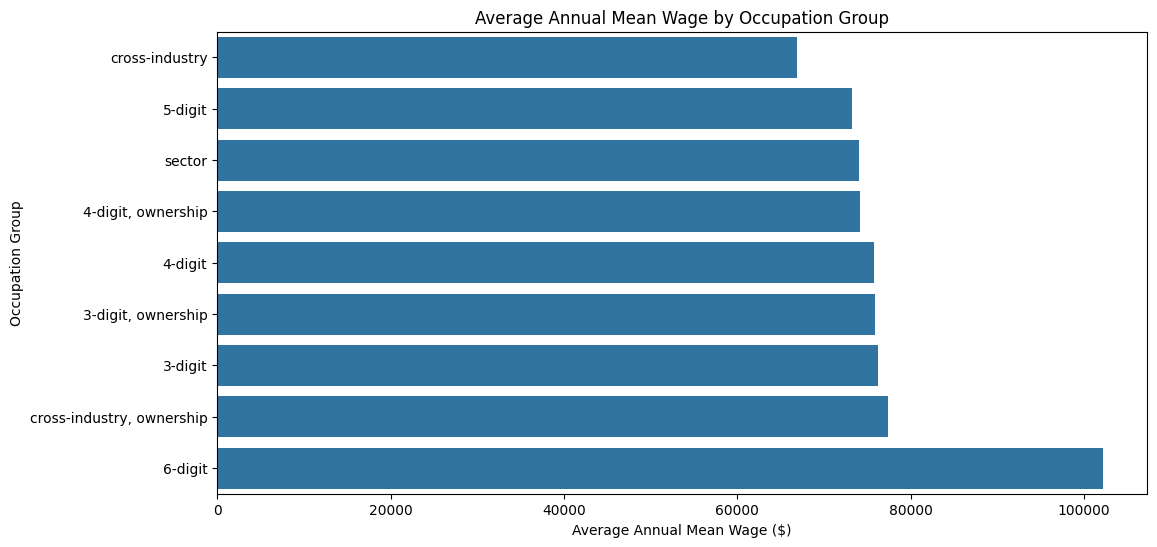

In [56]:
# Mean Wage by Occupation Group (Bar Plot)

group_means = df.groupby('I_GROUP')['A_MEAN'].mean().sort_values(ascending=True)


plt.figure(figsize=(12, 6))

sns.barplot(x=group_means.values, y=group_means.index)
plt.title('Average Annual Mean Wage by Occupation Group')
plt.xlabel('Average Annual Mean Wage ($)')
plt.ylabel('Occupation Group')
plt.show()

## Correlation analysis

In [60]:
# Correlation analysis between Total Employment and Annual Mean Wage
correlation = df[['TOT_EMP', 'A_MEAN']].corr()
correlation

,TOT_EMP,A_MEAN
TOT_EMP,1.000000,-0.002479
A_MEAN,-0.002479,1.000000


In [62]:
df[['TOT_EMP', 'A_MEAN', 'A_MEDIAN', 'H_MEAN', 'H_MEDIAN']].corr()

,TOT_EMP,A_MEAN,A_MEDIAN,H_MEAN,H_MEDIAN
TOT_EMP,1.000000,-0.002479,-0.006573,-0.002264,-0.006264
A_MEAN,-0.002479,1.000000,0.976130,1.000000,0.977884
A_MEDIAN,-0.006573,0.976130,1.000000,0.977884,1.000000
H_MEAN,-0.002264,1.000000,0.977884,1.000000,0.977883
H_MEDIAN,-0.006264,0.977884,1.000000,0.977883,1.000000


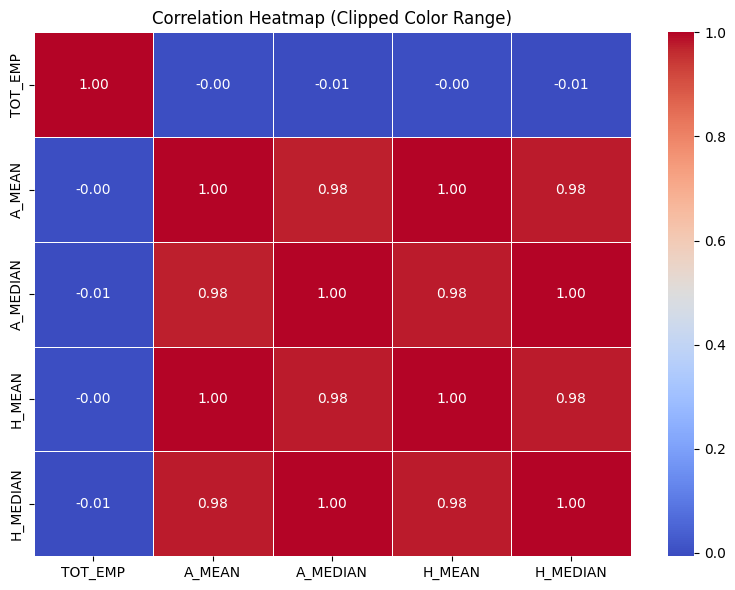

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['TOT_EMP', 'A_MEAN', 'A_MEDIAN', 'H_MEAN', 'H_MEDIAN']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Clipped Color Range)')
plt.tight_layout()
plt.show()


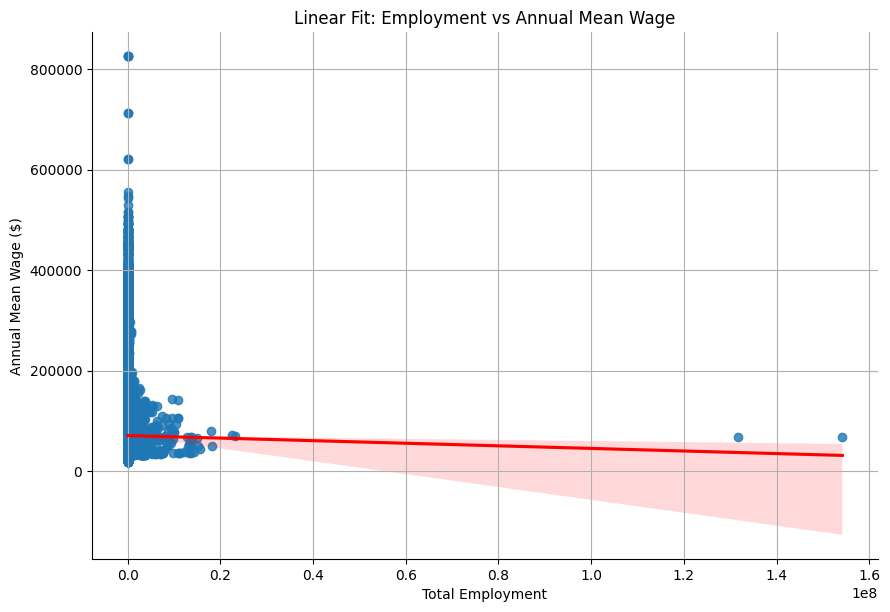

In [66]:
sns.lmplot(data=df, x='TOT_EMP', y='A_MEAN', height=6, aspect=1.5, line_kws={"color": "red"})
plt.title('Linear Fit: Employment vs Annual Mean Wage')
plt.xlabel('Total Employment')
plt.ylabel('Annual Mean Wage ($)')
plt.grid(True)
plt.show()


## Regression Analysis
We predict `A_MEAN` using `TOT_EMP` and `I_GROUP`.

In [68]:
df_reg = df.dropna(subset=['A_MEAN', 'TOT_EMP', 'I_GROUP'])
model = smf.ols('A_MEAN ~ TOT_EMP + C(I_GROUP)', data=df_reg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 A_MEAN   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     667.7
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:49:05   Log-Likelihood:            -4.6466e+06
No. Observations:              388093   AIC:                         9.293e+06
Df Residuals:                  388083   BIC:                         9.293e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

- **Regression shows that occupation group significantly affects wages.**
- **Employment size has a weak and negative relationship with wage.**

In [72]:
model.fittedvalues.isna().sum(), model.resid.isna().sum()


(0, 0)

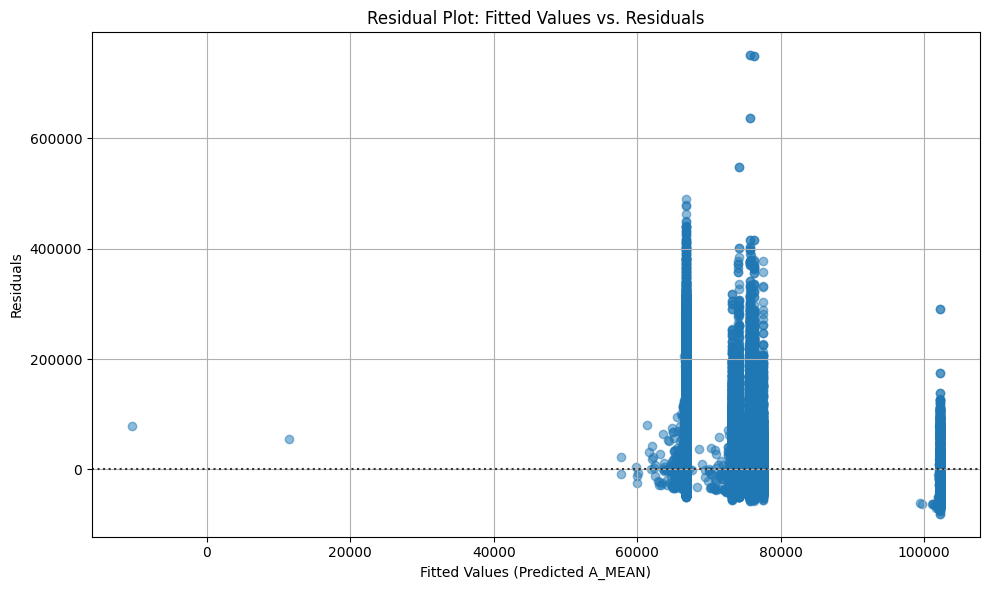

In [74]:
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=False, 
              scatter_kws={'alpha': 0.5})
plt.title('Residual Plot: Fitted Values vs. Residuals')
plt.xlabel('Fitted Values (Predicted A_MEAN)')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create VIF DataFrame
X = df_reg[['TOT_EMP']].copy()
X = sm.add_constant(X)
pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})


,Variable,VIF
0,const,1.00129
1,TOT_EMP,1.00000


###  Regression Interpretation Summary

- The regression model is statistically significant (p < 0.001), but it gives explaination only 1.5% of the variation in `A_MEAN` (R² = 0.015).
- **Occupation group (`I_GROUP`) has a significant impact** on wages, with along certain groups (e.g., `T.6-digit`) shows much larger wage levels.
- **Total employment (`TOT_EMP`) shows a very small negative effect** on wages, which shows with the earlier correlation result.
- **Multicollinearity is not an issue** in this model (VIF ≈ 1.0).
- Future models might be improve by including additional features like education level, job requirements, or regional indicators.


## ANOVA Analysis
We test whether mean wages differ significantly across occupational groups.

In [80]:
anova_model = smf.ols('A_MEAN ~ C(I_GROUP)', data=df_reg).fit()
anova_table = anova_lm(anova_model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(I_GROUP),8.0,8.812677e+12,1.101585e+12,749.95265,0.0
Residual,388084.0,5.700458e+14,1.468872e+09,NaN,NaN


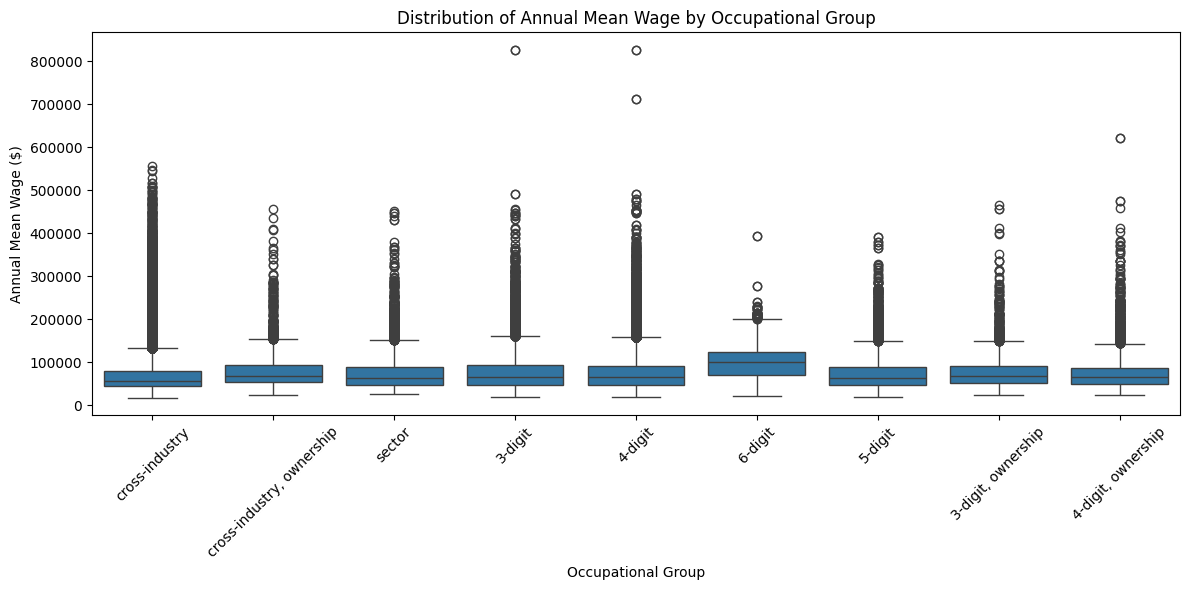

In [82]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='I_GROUP', y='A_MEAN')
plt.title('Distribution of Annual Mean Wage by Occupational Group')
plt.xlabel('Occupational Group')
plt.ylabel('Annual Mean Wage ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### ANOVA Interpretation Summary

- The ANOVA analysis confirms that **mean annual wages differ significantly across occupation groups** (`I_GROUP`).
- The F-statistic = **749.95**, with a p-value < 0.001, indicating strong evidence against the null hypothesis of equal means.
- This reinforces the findings from the regression model and validates the importance of occupational classification in wage analysis.


##  Conclusion & Recommendations
**Key Findings:**
- Wage disparity is evident across occupational groups.
- Occupation group significantly influences wage levels.
- High employment does not always mean high wages.

**Recommendations:**
- Prioritize wage improvement in low-paying occupations.
- Use these insights for policy and career planning.
- Future research can analyze geographic and temporal trends.

##  References
- U.S. Bureau of Labor Statistics. (2024). *Occupational Employment and Wage Statistics (OEWS)*. https://www.bls.gov/oes/
- Montgomery, D. C., & Runger, G. C. (2020). *Applied Statistics and Probability for Engineers* (7th ed.). Wiley.
- Seaborn Developers. (n.d.). *Seaborn Statistical Data Visualization Library*. https://seaborn.pydata.org/
- Statsmodels Developers. (n.d.). *Statsmodels: Statistical Modeling and Econometrics in Python*. https://www.statsmodels.org/
- McKinney, W. (2022). *Python for Data Analysis* (3rd ed.). O’Reilly Media.
- Virtanen, P., et al. (2020). *SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python*. *Nature Methods*, 17(3), 261–272.